In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread, mmwrite

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))[:2]
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'demuxalot']
atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos',
            'souporcell', 'souporcell_nogenos', 'scavengers']

con_cols = ['C1', 'C2', 'I1', 'I2']

In [3]:
gex_sings = pd.read_csv(f'{projdir}/csv/demux/singlet_gex.csv', sep='\t',
                  header=0, index_col=0)
atac_sings = pd.read_csv(f'{projdir}/csv/demux/singlet_atac.csv', sep='\t',
                   header=0, index_col=0)
gex_sings.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)
atac_sings.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)

tmp_gex_sings = gex_sings.copy()
tmp_atac_sings = atac_sings.copy()
tmp_gex_sings['inter'] = gex_sings.eq(gex_sings.iloc[:, 0], axis=0).all(1)
tmp_atac_sings['inter'] = atac_sings.eq(atac_sings.iloc[:, 0], axis=0).all(1)
gex_sings['inter'] = tmp_gex_sings['inter']
atac_sings['inter'] = tmp_atac_sings['inter']
gex_sings.shape, atac_sings.shape

((30497, 10), (30497, 10))

In [4]:
gex_sings

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,demuxalot,scsplit,scsplit_nogenos,inter
AAACAGCCAAGGTATA-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,True
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,True
AAACAGCCAGCAAATA-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,True
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,True
AAACATGCAAACATAG-1_20220928-IGVF-D0,1,1,1,1,1,1,1,1,1,True
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTCCAGGG-1_20220928-IGVF-D3,1,0,0,0,1,0,0,1,0,False
TTTGTTGGTTCCTGTG-1_20220928-IGVF-D3,0,1,1,1,1,1,1,1,1,False
TTTGTTGGTTGCCTCA-1_20220928-IGVF-D3,1,1,1,1,1,1,1,1,1,True
TTTGTTGGTTGGATAT-1_20220928-IGVF-D3,1,1,1,1,1,1,1,1,1,True


In [5]:
tmp_gex_sings = gex_sings.iloc[:,:-1]
tmp_gex_sings.columns = [f'gex_{x}' for x in tmp_gex_sings.columns]
tmp_atac_sings = atac_sings.iloc[:,:-1]
tmp_atac_sings.columns = [f'atac_{x}' for x in tmp_atac_sings.columns]
 
merged_sings = pd.concat([tmp_gex_sings, tmp_atac_sings], axis=1)
merged_sings['inter'] = merged_sings.eq(merged_sings.iloc[:, 0], axis=0).all(1)

In [6]:
sum(gex_sings['inter']), sum(atac_sings['inter']), sum(merged_sings['inter'])

(17642, 17390, 12022)

In [7]:
gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t',
                  header=0, index_col=0)
atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t',
                   header=0, index_col=0)
gex.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)
atac.replace({'doublet' : 'non_singlet' , 'unassigned' : 'non_singlet'}, inplace=True)

gex.shape, atac.shape

((30497, 9), (30497, 9))

In [8]:
tmp_gex = gex.copy()
tmp_atac = atac.copy()
tmp_gex['inter'] = gex.eq(gex.iloc[:, 0], axis=0).all(1)
tmp_atac['inter'] = atac.eq(atac.iloc[:, 0], axis=0).all(1)
# tmp_gex['majority'] = gex.mode(axis=1)[0]
# tmp_atac['majority'] = atac.mode(axis=1)[0]

# gex['majority'] = tmp_gex['majority']
# atac['majority'] = tmp_atac['majority']

gex['inter'] = tmp_gex['inter']
atac['inter'] = tmp_atac['inter']

# gex_inter = pd.DataFrame(tmp_gex[tmp_gex['inter']]['demuxlet'])
# gex_inter.columns = ['inter']

# atac_inter = pd.DataFrame(tmp_atac[tmp_atac['inter']]['demuxlet'])
# atac_inter.columns = ['inter']

gex.shape, atac.shape

((30497, 10), (30497, 10))

In [9]:
tmp_gex = gex.iloc[:,:-1]
tmp_gex.columns = [f'gex_{x}' for x in tmp_gex.columns]
tmp_atac = atac.iloc[:,:-1]
tmp_atac.columns = [f'atac_{x}' for x in tmp_atac.columns]
 
merged = pd.concat([tmp_gex, tmp_atac], axis=1)
merged['inter'] = merged.eq(merged.iloc[:, 0], axis=0).all(1)

In [10]:
sum(gex['inter']), sum(atac['inter']), sum(merged['inter'])

(17583, 15493, 10680)

In [11]:
gex_mask = ~gex['inter']
unique_gex = gex[gex_mask]

atac_mask = ~atac['inter']
unique_atac = atac[atac_mask]

all_mask = ~merged['inter']
unique_all = gex[all_mask]
unique_all['scavengers'] = merged['atac_scavengers']
unique_gex.shape, unique_atac.shape, unique_all.shape

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


((12914, 10), (15004, 10), (19817, 11))

In [12]:
def process_con(con):
    con['DP'] = np.sum(con.iloc[:,:4], axis=1)
    con['Consistent rate'] = (con['C1'] + con['C2']) / con['DP']
    con['Inconsistent rate'] = 1 - con['Consistent rate']
    con['C1 rate'] = con['C1'] / con['DP']
    con['C2 rate'] = con['C2'] / con['DP']
    con['I1 rate'] = con['I1'] / con['DP']
    con['I2 rate'] = con['I2'] / con['DP']
    return con

In [13]:
final_con_cols = ['C1', 'C2', 'I1', 'I2', 'DP',
                  'Consistent rate', 'Inconsistent rate',
                   'C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']

In [14]:
tmp_cols = con_cols + ['n_drops']
cov = 20
condir = f'{projdir}/csv/var_consistency/real/gex/merged/'
all_con_gex = pd.DataFrame(index=gex_methods, columns=tmp_cols, data=0)
for method in gex_methods:
    mask = unique_all[method] != 'non_singlet'
    method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
    method_gex = unique_all[mask]
    mask = method_con.index.isin(method_gex.index)
    method_con = method_con[mask]
    method_con = pd.DataFrame(method_con.sum(axis=0)[:4]).transpose()
    all_con_gex.loc[method] = list(method_con.iloc[0]) + [method_gex.shape[0]]
    print(method, method_gex.shape[0])
all_con_gex['method'] = all_con_gex.index

demuxlet 10730
freemuxlet 17494
vireo 11490
vireo_nogenos 12671
scsplit 15283
scsplit_nogenos 12892
souporcell 13460
souporcell_nogenos 14255
demuxalot 9306


In [15]:
tmp_cols = con_cols + ['n_drops']
cov = 20
condir = f'{projdir}/csv/var_consistency/real/atac/merged/'
all_con_atac = pd.DataFrame(index=atac_methods, columns=tmp_cols, data=0)
for method in atac_methods:
    mask = unique_all[method] != 'non_singlet'
    method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
    method_atac = unique_all[mask]
    mask = method_con.index.isin(method_atac.index)
    method_con = method_con[mask]
    method_con = pd.DataFrame(method_con.sum(axis=0)[:4]).transpose()
    all_con_atac.loc[method] = list(method_con.iloc[0]) + [method_atac.shape[0]]
    print(method, method_atac.shape[0])
all_con_atac['method'] = all_con_atac.index

demuxlet 10730
freemuxlet 17494
vireo 11490
vireo_nogenos 12671
scsplit 15283
scsplit_nogenos 12892
souporcell 13460
souporcell_nogenos 14255
scavengers 14572


In [16]:
### this is for unique_gex
# ### this is just singlets called by that method, I think this is fine!

# tmp_cols = con_cols + ['n_drops']
# cov = 20
# condir = f'{projdir}/csv/var_consistency/real/gex/{s}/'
# all_con_gex = pd.DataFrame(index=gex_methods, columns=tmp_cols, data=0)
# for method in gex_methods:
#     mask = unique_gex[method] != 'non_singlet'
#     method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
#     method_gex = unique_gex[mask]
#     mask = method_con.index.isin(method_gex.index)
#     method_con = method_con[mask]
#     method_con = pd.DataFrame(method_con.sum(axis=0)[:4]).transpose()
#     all_con_gex.loc[method] = list(method_con.iloc[0]) + [method_gex.shape[0]]
    
# test_con_gex = all_con_gex.iloc[:,:4].div(all_con_gex['n_drops'], axis=0)
# test_con_gex = process_con(test_con_gex)
# test_con_gex

In [17]:
### unique_atac
# ### this is just singlets called by that method, I think this is fine!

# tmp_cols = con_cols + ['n_drops']
# cov = 20
# condir = f'{projdir}/csv/var_consistency/real/atac/{s}/'
# all_con_atac = pd.DataFrame(index=atac_methods, columns=tmp_cols, data=0)
# for method in atac_methods:
#     mask = unique_atac[method] != 'non_singlet'
#     method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
#     method_atac = unique_atac[mask]
#     mask = method_con.index.isin(method_atac.index)
#     method_con = method_con[mask]
#     method_con = pd.DataFrame(method_con.sum(axis=0)[:4]).transpose()
#     all_con_atac.loc[method] = list(method_con.iloc[0]) + [method_atac.shape[0]]

    
# test_con_atac = all_con_atac.iloc[:,:4].div(all_con_atac['n_drops'], axis=0)
# test_con_atac = process_con(test_con_atac)
# test_con_atac

In [18]:
## unique_all
### this is just singlets called by that method, I think this is fine!

tmp_cols = con_cols + ['n_drops']
cov = 20
condir = f'{projdir}/csv/var_consistency/real/gex/merged/'
all_con_gex = pd.DataFrame(index=gex_methods, columns=tmp_cols, data=0)
for method in gex_methods:
    mask = unique_all[method] != 'non_singlet'
    method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
    method_gex = unique_all[mask]
    mask = method_con.index.isin(method_gex.index)
    method_con = method_con[mask]
    method_con = pd.DataFrame(method_con.sum(axis=0)[:4]).transpose()
    all_con_gex.loc[method] = list(method_con.iloc[0]) + [method_gex.shape[0]]

    
test_con_gex = all_con_gex.iloc[:,:4].div(all_con_gex['n_drops'], axis=0)
test_con_gex = process_con(test_con_gex)
test_con_gex

,C1,C2,I1,I2,DP,Consistent rate,Inconsistent rate,C1 rate,C2 rate,I1 rate,I2 rate
demuxlet,29.538677,573.260019,26.499627,2.432712,631.731034,0.954201,0.045799,0.046758,0.907443,0.041948,0.003851
freemuxlet,37.063679,854.159483,79.200354,5.108266,975.531782,0.913577,0.086423,0.037993,0.875583,0.081187,0.005236
vireo,33.843603,663.677198,32.738729,2.961880,733.221410,0.951310,0.048690,0.046157,0.905153,0.044651,0.004040
vireo_nogenos,35.010023,712.907979,41.942388,3.450083,793.310473,0.942781,0.057219,0.044132,0.898649,0.052870,0.004349
scsplit,24.102140,522.193679,40.383433,2.740758,589.420009,0.926836,0.073164,0.040891,0.885945,0.068514,0.004650
scsplit_nogenos,30.338194,667.775908,54.017530,3.897068,756.028700,0.923396,0.076604,0.040128,0.883268,0.071449,0.005155
souporcell,36.202452,823.428529,63.688856,4.664116,927.983952,0.926343,0.073657,0.039012,0.887331,0.068631,0.005026
souporcell_nogenos,34.618941,758.981480,55.912732,4.089723,853.602876,0.929707,0.070293,0.040556,0.889151,0.065502,0.004791
demuxalot,28.198152,534.649151,18.317322,2.103589,583.268214,0.964989,0.035011,0.048345,0.916644,0.031405,0.003607


In [19]:
## unique_all
### this is just singlets called by that method, I think this is fine!

tmp_cols = con_cols + ['n_drops']
cov = 20
condir = f'{projdir}/csv/var_consistency/real/atac/merged/'
all_con_atac = pd.DataFrame(index=atac_methods, columns=tmp_cols, data=0)
for method in atac_methods:
    mask = unique_all[method] != 'non_singlet'
    method_con = pd.read_csv(f'{condir}/{method}_cov{cov}_varcon.csv', sep='\t', header=0, index_col=0)
    method_atac = unique_all[mask]
    mask = method_con.index.isin(method_atac.index)
    method_con = method_con[mask]
    method_con = pd.DataFrame(method_con.sum(axis=0)[:4]).transpose()
    all_con_atac.loc[method] = list(method_con.iloc[0]) + [method_atac.shape[0]]

raw_con_atac = all_con_atac.copy()

test_con_atac = all_con_atac.iloc[:,:4].div(all_con_atac['n_drops'], axis=0)
test_con_atac = process_con(test_con_atac)
test_con_atac

,C1,C2,I1,I2,DP,Consistent rate,Inconsistent rate,C1 rate,C2 rate,I1 rate,I2 rate
demuxlet,80.018733,1348.344734,25.724418,2.481733,1456.569618,0.980635,0.019365,0.054936,0.925699,0.017661,0.001704
freemuxlet,111.535098,2244.796102,165.407225,6.093003,2527.831428,0.932155,0.067845,0.044123,0.888032,0.065434,0.002410
vireo,88.508442,1545.186597,40.398520,3.072150,1677.165709,0.974081,0.025919,0.052773,0.921308,0.024087,0.001832
vireo_nogenos,93.001973,1668.535317,58.096046,3.603109,1823.236445,0.966160,0.033840,0.051009,0.915150,0.031864,0.001976
scsplit,84.476477,1621.912190,87.146568,3.844926,1797.380161,0.949375,0.050625,0.047000,0.902376,0.048485,0.002139
scsplit_nogenos,81.048712,1469.179724,83.175147,3.842073,1637.245656,0.946851,0.053149,0.049503,0.897348,0.050802,0.002347
souporcell,96.750149,1822.256315,89.386850,4.654160,2013.047474,0.953284,0.046716,0.048062,0.905223,0.044404,0.002312
souporcell_nogenos,92.547387,1707.632340,75.812978,4.089442,1880.082147,0.957501,0.042499,0.049225,0.908275,0.040324,0.002175
scavengers,113.856231,2043.240393,93.816086,4.816086,2255.728795,0.956275,0.043725,0.050474,0.905801,0.041590,0.002135


In [20]:
test_con_gex['method'] = [f'gex_{x}' for x in test_con_gex.index]
test_con_atac['method'] = [f'atac_{x}' for x in test_con_atac.index]

<AxesSubplot:xlabel='variable', ylabel='value'>

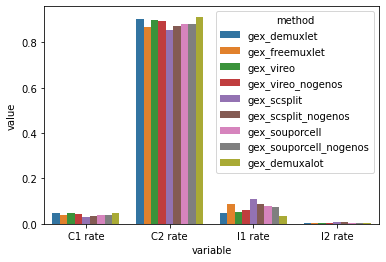

In [21]:
melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']
gex_melt_con = test_con_gex.melt(id_vars='method', value_vars=melt_cols)
sns.barplot(gex_melt_con, x='variable', y='value', hue='method')

<AxesSubplot:xlabel='variable', ylabel='value'>

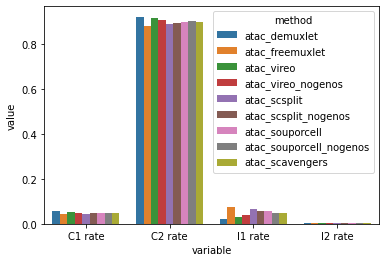

In [22]:
melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate']
atac_melt_con = test_con_atac.melt(id_vars='method', value_vars=melt_cols)
sns.barplot(atac_melt_con, x='variable', y='value', hue='method')

In [23]:
gex_melt_con['mod'] = 'gex'
atac_melt_con['mod'] = 'atac'

In [24]:
merged = pd.concat([gex_melt_con, atac_melt_con])
merged['method'] = [x.replace('gex_','').replace('atac_','') for x in merged['method']]

<AxesSubplot:xlabel='method', ylabel='value'>

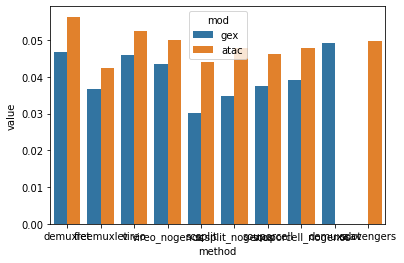

In [25]:
tmp_merged = merged[merged['variable'] == 'C1 rate']
sns.barplot(tmp_merged, x='method', y='value', hue='mod')

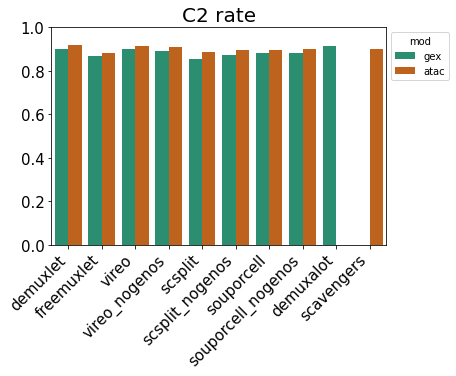

In [26]:
sns.set_palette('Dark2')

tmp_merged = merged[merged['variable'] == 'C2 rate']
ax = sns.barplot(tmp_merged, x='method', y='value', hue='mod')
ax.set_ylim(0, 1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15,
                   horizontalalignment='right')
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title(f'C2 rate', fontsize=20)
# custom_ticks = np.linspace(0, 0.2, 5)
# ax.set_yticks(custom_ticks, fontsize=20)
ax.tick_params(axis='y', labelsize=15)  # Adjust the labelsize parameter as needed
ax.grid(False)

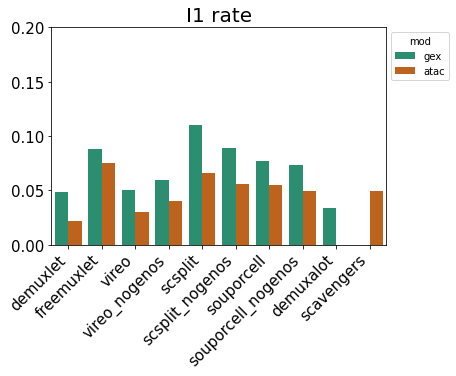

In [27]:
sns.set_palette('Dark2')

tmp_merged = merged[merged['variable'] == 'I1 rate']
ax = sns.barplot(tmp_merged, x='method', y='value', hue='mod')
ax.set_ylim(0, 0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15,
                   horizontalalignment='right')
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title(f'I1 rate', fontsize=20)
custom_ticks = np.linspace(0, 0.2, 5)
ax.set_yticks(custom_ticks, fontsize=20)
ax.tick_params(axis='y', labelsize=15)  # Adjust the labelsize parameter as needed
ax.grid(False)

In [33]:
### insanely ratchet
merged.loc[73] = ['scavengers', 'C1 rate', 0, 'gex']
merged.loc[74] = ['scavengers', 'C2 rate', 0, 'gex']
merged.loc[75] = ['scavengers', 'I1 rate', 0, 'gex']
merged.loc[76] = ['scavengers', 'I2 rate', 0, 'gex']
merged.loc[77] = ['demuxalot', 'C1 rate', 0, 'atac']
merged.loc[78] = ['demuxalot', 'C2 rate', 0, 'atac']
merged.loc[79] = ['demuxalot', 'I1 rate', 0, 'atac']
merged.loc[80] = ['demuxalot', 'I2 rate', 0, 'atac']

In [34]:
merged.to_csv(f'{projdir}/csv/final_figures/figure6/figure_6b_avg_con_rates.csv', sep='\t', header=True, index=True)

### extra

In [123]:
# melt_cols = ['C1 rate', 'C2 rate', 'I1 rate', 'I2 rate', 'method']
# melt_con = method_con.melt(id_vars='donor', value_vars=melt_cols)

# sns.boxplot(melt_con, x='variable', y='value', hue='donor')

In [124]:
method_con

,C1,C2,I1,I2
0,1296015,23392650,1279481,59543


In [125]:
### what about singlets completely unique to that method?
### code is a tad bit more complciated...
# for i,method in enumerate(gex.columns[:7]):
#     mask = gex[method] != 'non_singlet'
#     print(gex[mask].shape)

In [64]:
gex.iloc[:,0]

AAACAGCCAAGGTATA-1_20220928-IGVF-D0          27_C4
AAACAGCCAATGCGCT-1_20220928-IGVF-D0          25_A4
AAACAGCCAGCAAATA-1_20220928-IGVF-D0          27_C4
AAACAGCCATTGTGAT-1_20220928-IGVF-D0          25_A4
AAACATGCAAACATAG-1_20220928-IGVF-D0          25_A4
                                          ...     
TTTGTTGGTTCCAGGG-1_20220928-IGVF-D3         26_A10
TTTGTTGGTTCCTGTG-1_20220928-IGVF-D3    non_singlet
TTTGTTGGTTGCCTCA-1_20220928-IGVF-D3          25_A4
TTTGTTGGTTGGATAT-1_20220928-IGVF-D3          25_A4
TTTGTTGGTTTGACCT-1_20220928-IGVF-D3         26_A10
Name: demuxlet, Length: 30497, dtype: object

In [89]:
tmp = unique_gex.iloc[:,:-1]
to_plot = tmp.melt(value_vars=tmp.columns)
to_plot.head()

,variable,value
0,demuxlet,27_C4
1,demuxlet,27_C4
2,demuxlet,48_V3
3,demuxlet,non_singlet
4,demuxlet,non_singlet


<AxesSubplot:xlabel='variable', ylabel='Count'>

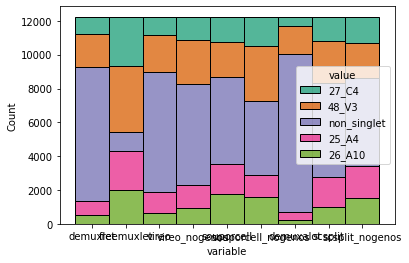

In [92]:
sns.histplot(to_plot, x='variable', hue='value', multiple='stack')

In [93]:
tmp = unique_atac.iloc[:,:-1]
to_plot = tmp.melt(value_vars=tmp.columns)
to_plot.head()

,variable,value
0,demuxlet,non_singlet
1,demuxlet,26_A10
2,demuxlet,non_singlet
3,demuxlet,non_singlet
4,demuxlet,non_singlet


<AxesSubplot:xlabel='variable', ylabel='Count'>

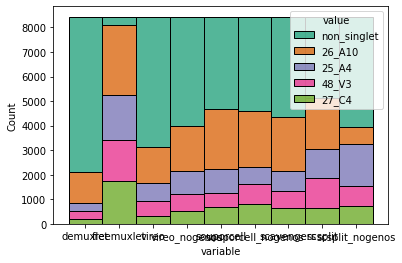

In [94]:
sns.histplot(to_plot, x='variable', hue='value', multiple='stack')

In [66]:
extra_gex = pd.DataFrame(index=['gex'])
for method in gex_methods:
    gex_mask = unique_gex[method] != 'non_singlet'
    extra_gex[method] = unique_gex[gex_mask].shape[0]
# extra_gex = extra_gex.transpose()

In [67]:
extra_atac = pd.DataFrame(index=['atac'])
for method in atac_methods:
    atac_mask = unique_atac[method] != 'non_singlet'
    extra_atac[method] =  unique_atac[atac_mask].shape[0]

In [68]:
extra_gex

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
gex,4359,11123,5119,6300,6653,7007,7089,7884,2935


In [69]:
extra_atac

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
atac,2113,8103,3137,3982,5135,3961,4698,4582,4340


In [70]:
extra_sings = pd.concat([extra_gex, extra_atac]).transpose()

In [71]:
extra_sings['gex']

demuxlet               4359.0
freemuxlet            11123.0
vireo                  5119.0
vireo_nogenos          6300.0
scsplit                6653.0
scsplit_nogenos        7007.0
souporcell             7089.0
souporcell_nogenos     7884.0
demuxalot              2935.0
scavengers                NaN
Name: gex, dtype: float64

Text(0.5, 0.98, 'Stem cell dataset')

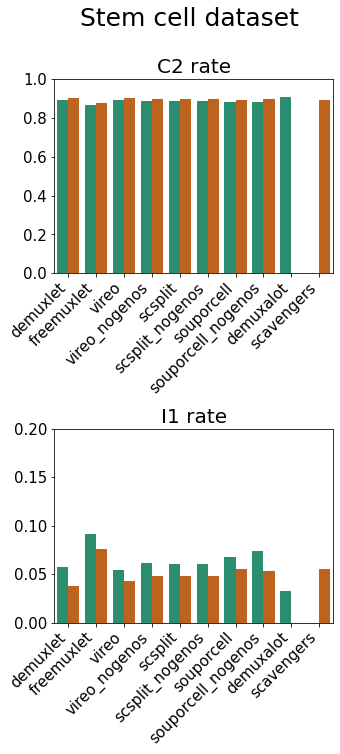

In [72]:
sns.set_palette('Dark2')
final_cols = ['C2 rate', 'I1 rate']

ylims = [1, 0.2]

fig, axes = plt.subplots(2, 1, figsize=(5, 10))

for i,ax in enumerate(axes.flatten()):
    col = final_cols[i]
    ylim = ylims[i]
    tmp_merged = merged[merged['variable'] == col]
    sns.barplot(tmp_merged, x='method', y='value', hue='mod', ax=ax)
    ax.set_ylim(0, ylim)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15,
                       horizontalalignment='right')

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(col, fontsize=20)
    ax.tick_params(axis='y', labelsize=15)  # Adjust the labelsize parameter as needed
    ax.grid(False)
    ax.legend_.set_visible(False)
    
plt.subplots_adjust(wspace=0.2, hspace=0.8)  # Adjust the value as needed
plt.suptitle('Stem cell dataset', size=25)